1. Plot the populations for the years in the period. Add legend and axis labels to the plot.

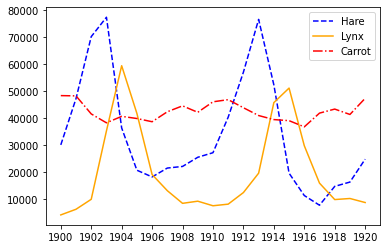

In [2]:
import numpy as np
import matplotlib.pyplot as plt

animals = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')
years = animals[:,0]

plt.plot(years, animals[:, 1], label = 'Hare', c = 'blue', linestyle = '--')
plt.plot(years, animals[:, 2], label = 'Lynx', c = 'orange', linestyle = '-')
plt.plot(years, animals[:, 3], label = 'Carrot', c = 'red', linestyle = '-.')


plt.xlabel('year')
plt.ylabel('population')
plt.legend()
plt.xticks(years[::2].astype(int))
plt.show()


2. Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each species for the years in the period.


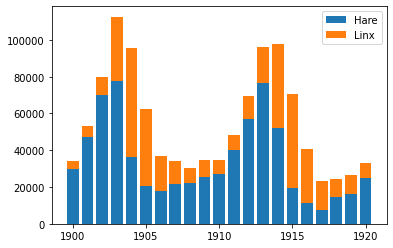

In [3]:
plt.bar(years, animals[:,1], label = 'Hare')
plt.bar(years, animals[:,2], label = 'Linx', bottom = animals[:, 1])

plt.legend()
plt.show()


#часть в комментариях - только отношение числа зайцев к числу лисиц, без отображения общего количества
#total = animals[:, 1] + animals[:, 2]
#plt.bar(years, animals[:, 1] / total, label = 'Hare')
#plt.bar(years, animals[:, 2] / total, label = 'Lynx', bottom = animals[:, 1] / total)

#plt.legend()
#plt.show()

3. Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

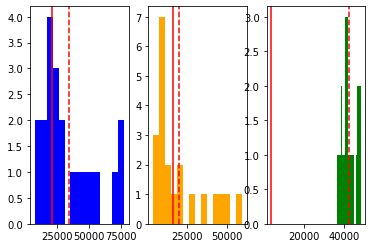

In [42]:
fig, ax = plt.subplots(1,3)

ax[0].hist(animals[:, 1], bins = 15, label = 'Hare', color = 'blue')
ax[0].axvline(animals[:,1].mean(), c = 'red', linestyle = '--')
ax[0].axvline(animals[:,1].std(), c = 'red', linestyle = '-')

ax[1].hist(animals[:, 2], bins = 15, label = 'Lynx', color = 'orange')
ax[1].axvline(animals[:,2].mean(), c = 'red', linestyle = '--')
ax[1].axvline(animals[:,2].std(), c = 'red', linestyle = '-')

ax[2].hist(animals[:, 3], bins = 15, label = 'Carrot', color = 'green')
ax[2].axvline(animals[:,3].mean(), c = 'red', linestyle = '--')
ax[2].axvline(animals[:,3].std(), c = 'red', linestyle = '-')

plt.show()

4. Find which year each species had the largest population. Mark these years in the plot of populations.

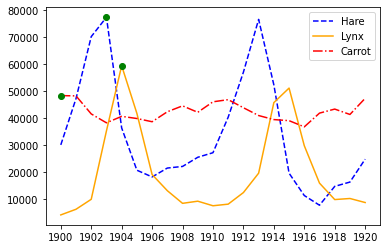

In [20]:
plt.plot(years, animals[:, 1], label = 'Hare', c = 'blue', linestyle = '--')
plt.plot(years[animals[:, 1].argmax()], animals[:, 1].max(), 'og')

plt.plot(years, animals[:, 2], label = 'Lynx', c = 'orange', linestyle = '-')
plt.plot(years[animals[:, 2].argmax()], animals[:, 2].max(), 'og')

plt.plot(years, animals[:, 3], label = 'Carrot', c = 'red', linestyle = '-.')
plt.plot(years[animals[:, 3].argmax()], animals[:, 3].max(), 'og')

plt.legend()
plt.xticks(years[::2].astype(int))
plt.show()

5. Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


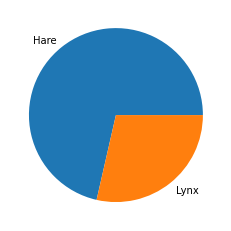

In [6]:
im = (animals[:,1] > animals[:,2]).astype(int)
print(np.array(['H', 'L'])[1 - im])

plt.pie(np.array([np.count_nonzero(im) / im.size, 1 - np.count_nonzero(im) / im.size]), labels = ('Hare', 'Lynx'))
plt.show()

6. Find which years any of the populations is above 50000. Show time periods where populations are above 50000 in the plot of populations.

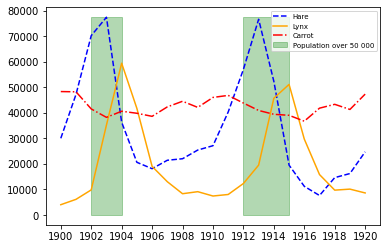

In [7]:
plt.plot(years, animals[:, 1], label = 'Hare', c = 'blue', linestyle = '--')
plt.plot(years, animals[:, 2], label = 'Lynx', c = 'orange', linestyle = '-')
plt.plot(years, animals[:, 3], label = 'Carrot', c = 'red', linestyle = '-.')

y = np.max(animals[:,1:])*(np.max(animals[:,1:], axis = 1) > 50000)
plt.fill_between(years, y, where=y>0, color="g", alpha=0.3, label = 'Population over 50 000')

plt.legend(loc = 'best', fontsize = 'x-small')
plt.xticks(years[::2].astype(int))
plt.show()



7. Find the top 2 years for each species when they had the lowest populations.

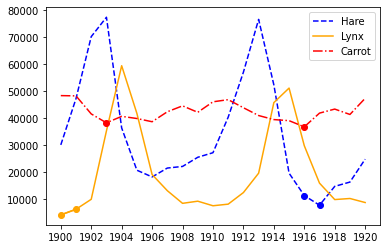

In [27]:
plt.plot(years, animals[:, 1], label = 'Hare', c = 'blue', linestyle = '--')
n = np.argsort(animals[:,1])
plt.plot(years[n[0:2]], animals[n[0:2],1], 'ob')

plt.plot(years, animals[:, 2], label = 'Lynx', c = 'orange', linestyle = '-')
n = np.argsort(animals[:,2])
plt.plot(years[n[0:2]], animals[n[0:2],2], marker = 'o', color = 'orange')

plt.plot(years, animals[:, 3], label = 'Carrot', c = 'red', linestyle = '-.')
n = np.argsort(animals[:,3])
plt.plot(years[n[0:2]], animals[n[0:2],3], 'or')

plt.legend()
plt.xticks(years[::2].astype(int))
plt.show()

8. Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

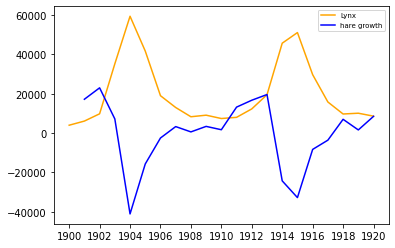

[[ 1.         -0.69334852]
 [-0.69334852  1.        ]]


In [33]:
plt.plot(years, animals[:,2], label = 'Lynx', color = 'orange')
plt.plot(years[1:], np.diff(animals[:,1]), label = 'hare growth', color = 'blue')

plt.legend(loc = 'upper right', fontsize = 'x-small')
plt.xticks(years[::2].astype(int))
plt.show()

print(np.corrcoef(np.diff(animals[:,1]), animals[:-1,2]))

9. Show population of hares vs carrots and hares vs lynxes.

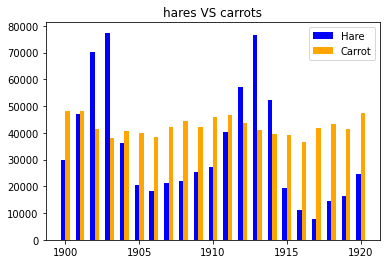

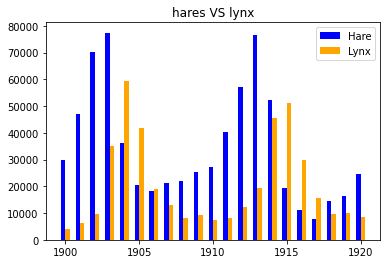

In [103]:
plt.bar(years - 0.15, animals[:,1], width = 0.3, label = 'Hare', color = 'blue')
plt.bar(years + 0.15, animals[:,3], width = 0.3, label = 'Carrot', color = 'orange')
plt.title('hares VS carrots')

plt.legend()
plt.show()

plt.bar(years - 0.15, animals[:,1], width = 0.3, label = 'Hare', color = 'blue')
plt.bar(years + 0.15, animals[:,2], width = 0.3, label = 'Lynx', color = 'orange')
plt.title('hares VS lynx')

plt.legend()
plt.show()

10. 
Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value with the true value and print a ratio of the error to the true value.

0.04048582995951422


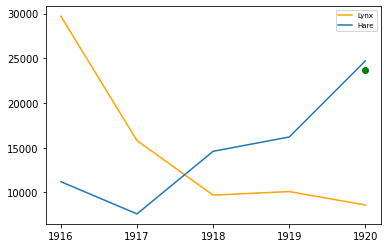

In [60]:
plt.plot(years[16:], animals[16:,2], label = 'Lynx', color = 'orange')
plt.plot(years[16:], animals[16:,1], label = 'Hare')

plt.plot(years[-1], animals[-2,1] - np.diff(animals[:,2])[-1] + np.diff(animals[:,3])[-1], 'og')

print(1 - (animals[-2,1] - np.diff(animals[:,2])[-1] + np.diff(animals[:,3])[-1]) / animals[-1,1])

plt.legend(loc = 'upper right', fontsize = 'x-small')
plt.xticks(years[16:].astype(int))
plt.show()